# ROI algbebra

It can sometimes be useful to create regions of interest (ROIs) corresponding to a combination of ROIs, to a difference between ROIs, or to an intersection of ROIs.  This notebook demonstrates how to achieve this in [scikit-rt](https://scikit-rt.github.io/scikit-rt/), using ROI algebra.

## Module import and configuration

The following imports modules needed for this example, and sets some options.

In [1]:
from skrt import set_viewer_options
from skrt.core import Defaults
from skrt.simulation import SyntheticImage

# Set Matplotlib runtime configuration (optional).
set_viewer_options()

# Set ROI plot type.
roi_plot_type = "filled"

# In place of interactive images, display static graphics that can be saved with notebook.
# Defaults().no_ui = True
# Omit user part of paths when printing object attributes.
# Defaults().compress_user = True

## Create synthetic data

The following creates and synthetic image, featuring a cube and a sphere, and extracts the ROIs corresponding to these shapes.

In [2]:
# Image definition
# ================

# Define image shape (rows, columns, slices).
shape = (50, 50, 80)

# Define image origin - (x,y,z) coordinates
# of centre of voxel at row 0, column 0, slice 0.
origin = (0.5, 0.5, 0.5)

# Define (dx,dy,dz) voxel size in mm.
voxel_size = (1, 1, 1)

# Define background greyscale value.
intensity = -1000

# Cube definition
# ===============

# Define cube side length in mm.
cube_side = 22

# Define (x,y,z) coordinates of cube centre.
cube_centre = (20, 30, 40)

# Define grey-scale value for cube.
cube_intensity = 50

# Define name for cube ROI.
cube_name = "cube"

# Sphere definition
# =================

# Define sphere radius in mm.
sphere_radius = 15

# Define (x,y,z) coordinates of sphere centre.
sphere_centre = (30, 20, 40)

# Define grey-scale value for sphere.
sphere_intensity = 200

# Define name for sphere ROI.
sphere_name = "sphere"

# Data creation
# =============

# Create image.
sim = SyntheticImage(shape, origin=origin, voxel_size=voxel_size,
                     intensity=intensity)

# Add cube to image, and retrieve its ROI.
sim.add_cube(side_length=cube_side, centre=cube_centre,
             intensity=cube_intensity, name=cube_name)
cube = sim.get_roi(cube_name)

# Add sphere to image, and retrieve its ROI.
sim.add_sphere(radius=sphere_radius, centre=sphere_centre,
               intensity=sphere_intensity, name=sphere_name)
sphere = sim.get_roi(sphere_name)

## Data visualisation

The following displays the synthetic image, with ROIs superimposed, and displays the individual ROIs separately.

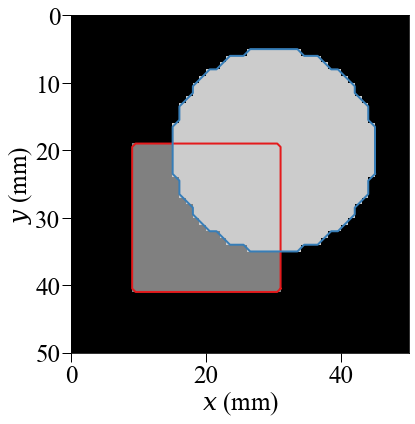

In [3]:
# Display synthetic image, with ROIs superimposed.
sim.view(rois=[cube, sphere]);

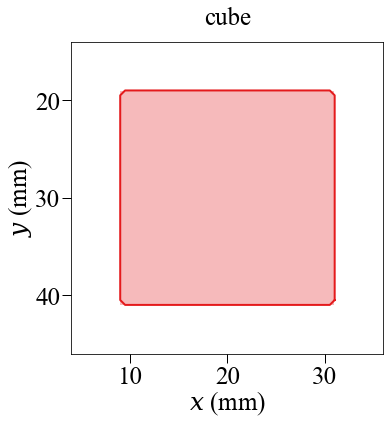

In [4]:
# Display cube.
cube.view(plot_type=roi_plot_type);

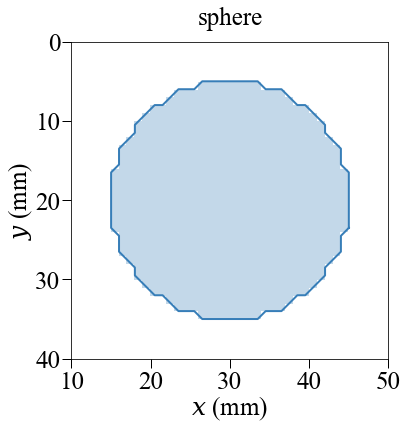

In [5]:
# Display sphere.
sphere.view(plot_type=roi_plot_type);

## ROI addition

Adding ROIs creates an ROI that encloses the volumes of the originals.  In this example, the ROIs added overlap, but they could also be disjoint.

Technically, the result is an ROI represented by a binary mask that is the logical OR of the binary masks representing the ROIs that are added.

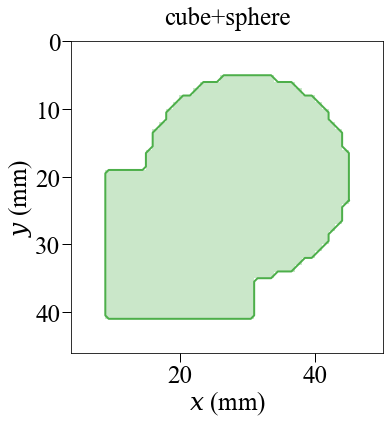

In [6]:
# Add ROIs.
cube_plus_sphere = cube + sphere

# Display result of ROI addition.
cube_plus_sphere.view(plot_type=roi_plot_type);

## ROI subtraction

Subtracting one ROI from another creates an ROI that encloses the volume of their difference.

Technically, the result is an ROI represented by a binary mask that is the logical AND of (1) the binary mask representing the initial ROI and (2) the negation of the binary mask representing the ROI that is subtracted.

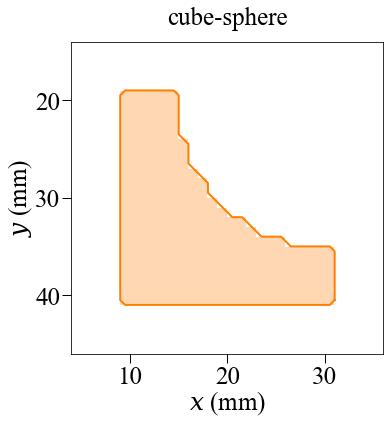

In [7]:
# Subtract one ROI from another.
cube_minus_sphere = cube - sphere

# Display result of ROI subtraction.
cube_minus_sphere.view(plot_type=roi_plot_type);

## ROI multiplication

Mulitplying ROIs creates an ROI that encloses the volumes of the intersection of the originals.

Technically, the result is an ROI represented by a binary mask that is the logical AND of the binary masks representing the ROIs that are multiplied.  This logical operation is equivalent to the element-wise multiplication of the binary masks.

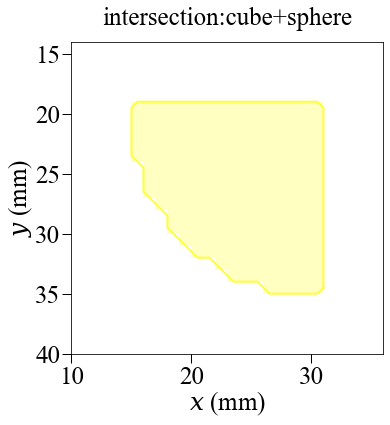

In [8]:
# Multiply ROIs.
cube_sphere_intersection = cube * sphere

# Display result of ROI multiplication.
cube_sphere_intersection.view(plot_type=roi_plot_type);